# Import libraries

In [59]:
library(tidyverse)
library(Cairo)
options(warn=-1)

# color blind palette
# http://www.cookbook-r.com/Graphs/Colors_(ggplot2)/#a-colorblind-friendly-palette
cbPalette <- c("#666666", "#E69F00", "#56B4E9", 
               "#009E73", "#CC79A7", "#0072B2", "#D55E00", "#F0E442")

theme_set(theme_classic(base_family = "Helvetica", base_size = 8) +
theme(          
  strip.background = element_blank(),
  strip.text.x = element_text(size = 8),
  axis.line = element_line(size = .25),
  axis.ticks = element_line(size = .25),
  axis.text.x = element_text(size = 8, color = 'black'),
  axis.text.y = element_text(size = 8, color = 'black'),
  legend.text = element_text(size = 8),
    
))

# Load cell viability data

In [60]:
file <- "../rawdata/cell_viability/suppfig7/processeddata/analysis1.csv"
data <- read_csv(file, col_types = c(col_integer())) %>% 
  mutate(samplelabel = forcats::fct_reorder(factor(
          stringr::str_replace(samplelabel, '-','\u2013')), day)) %>% 
  mutate(xlabel = paste(cellline, samplelabel, day, sep = "_")) %>% 
  mutate(xlabel = forcats::fct_reorder(xlabel, day)) %>% 
  print

# A tibble: 50 x 6
     day viability cellline samplelabel      sterr         xlabel
   <int>     <dbl>    <chr>      <fctr>      <dbl>         <fctr>
 1     0  1.000000       WT        Rich 0.03122341      WT_Rich_0
 2     0  1.000000       WT        –Leu 0.02019473      WT_–Leu_0
 3     0  1.000000       WT        –Arg 0.01471961      WT_–Arg_0
 4     0  1.000000  GCN2 KO        Rich 0.01473813 GCN2 KO_Rich_0
 5     0  1.000000  GCN2 KO        –Leu 0.05022690 GCN2 KO_–Leu_0
 6     0  1.000000  GCN2 KO        –Arg 0.01096296 GCN2 KO_–Arg_0
 7     1  2.630059       WT        Rich 0.07237813      WT_Rich_1
 8     1  1.650270       WT        –Leu 0.03509333      WT_–Leu_1
 9     1  1.189889       WT        –Arg 0.07128115      WT_–Arg_1
10     1  2.228738  GCN2 KO        Rich 0.06936642 GCN2 KO_Rich_1
# ... with 40 more rows


# Plot cell viability data (supp. fig. 7)

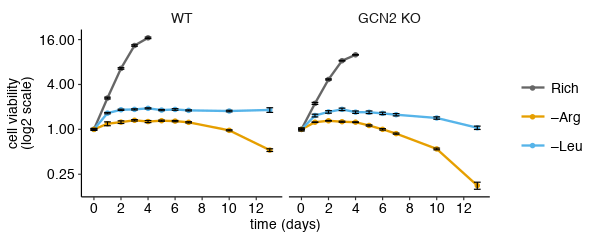

In [63]:
options(repr.plot.width = 5, repr.plot.height = 2)

p  <- data %>%
  ggplot(aes(x = day, y = viability )) +
  geom_line(size=.5, alpha=1, aes(color= samplelabel)) + geom_point(size=.5, aes(color= samplelabel)) +
  
  geom_errorbar(aes(ymin = (viability - sterr),
                    ymax = (viability + sterr)), 
                width = .5, size = 0.25)  +
  facet_wrap(~forcats::fct_rev(cellline), ncol = 2, scales = "free_x") +
  theme(axis.text.x = element_text(hjust = .5)) +
  scale_y_continuous(trans = 'log2') +
  scale_x_continuous(breaks= scales::pretty_breaks(n=9)) +
  scale_color_manual(values = cbPalette[1:3]) +
  xlab("time (days)") + ylab("cell viability\n(log2 scale)") +
  theme(legend.title=element_blank()) 
p

ggsave("../figures/suppfig7.pdf", width = 5, height = 2, device = cairo_pdf)